In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
df = pd.read_csv('summary.csv')

"""
log_entry = np.hstack((
    control_timestep,          # Timestamp
    cur_pos, target_pos,       # Position
    cur_vel, target_vel,       # Velocity
    cur_rpy, desired_euler,    # Orientation
    desired_thrust             # Thrust command
))
"""
# assign column names
df.columns = [
    'timestamp',
    'cur_pos_x', 'cur_pos_y', 'cur_pos_z',
    'target_pos_x', 'target_pos_y', 'target_pos_z',
    'cur_vel_x', 'cur_vel_y', 'cur_vel_z',
    'target_vel_x', 'target_vel_y', 'target_vel_z',
    'cur_rpy_x', 'cur_rpy_y', 'cur_rpy_z',
    'desired_euler_x', 'desired_euler_y', 'desired_euler_z',
    'desired_thrust'
]

# subtract timestamp of first entry
df['timestamp'] -= df['timestamp'][0]

In [2]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Define a color palette (matching previous plot for consistency)
palette = sns.color_palette("deep", 4)  # 3 colors for x, y, z

time_range = (0, 10)  # seconds


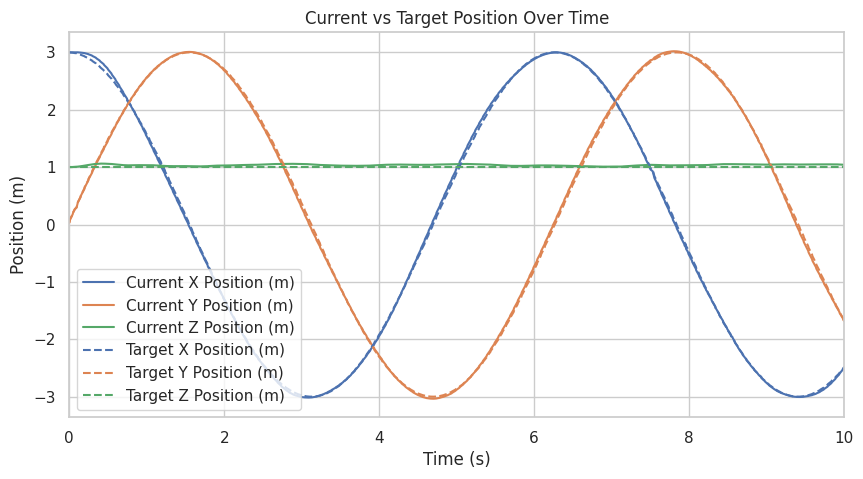

In [3]:
plt.figure(figsize=(10, 5))

# Plot current positions (solid lines)
plt.plot(df['timestamp'], df['cur_pos_x'], label='Current X Position (m)', color=palette[0], linestyle='-')
plt.plot(df['timestamp'], df['cur_pos_y'], label='Current Y Position (m)', color=palette[1], linestyle='-')
plt.plot(df['timestamp'], df['cur_pos_z'], label='Current Z Position (m)', color=palette[2], linestyle='-')

# Plot target positions (dashed lines with same color)
plt.plot(df['timestamp'], df['target_pos_x'], label='Target X Position (m)', color=palette[0], linestyle='--')
plt.plot(df['timestamp'], df['target_pos_y'], label='Target Y Position (m)', color=palette[1], linestyle='--')
plt.plot(df['timestamp'], df['target_pos_z'], label='Target Z Position (m)', color=palette[2], linestyle='--')

plt.xlim(time_range)
# Beautify the plot
plt.legend()
plt.title('Current vs Target Position Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.savefig('./figures/position.png')

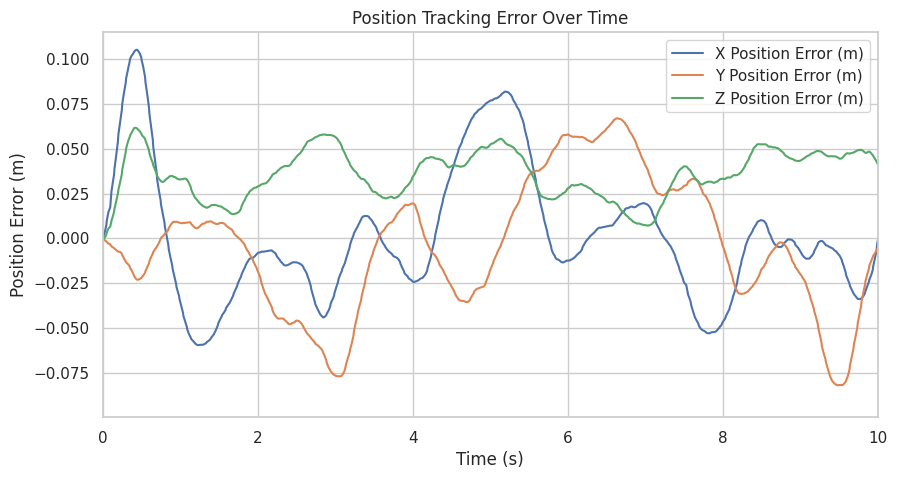

In [4]:
plt.figure(figsize=(10, 5))

# Plot position errors
plt.plot(df['timestamp'], df['cur_pos_x'] - df['target_pos_x'], label='X Position Error (m)', color=palette[0], linestyle='-')
plt.plot(df['timestamp'], df['cur_pos_y'] - df['target_pos_y'], label='Y Position Error (m)', color=palette[1], linestyle='-')
plt.plot(df['timestamp'], df['cur_pos_z'] - df['target_pos_z'], label='Z Position Error (m)', color=palette[2], linestyle='-')
plt.xlim(time_range)

# Beautify the plot
plt.legend()
plt.title('Position Tracking Error Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position Error (m)')
plt.savefig('./figures/position_error.png') 


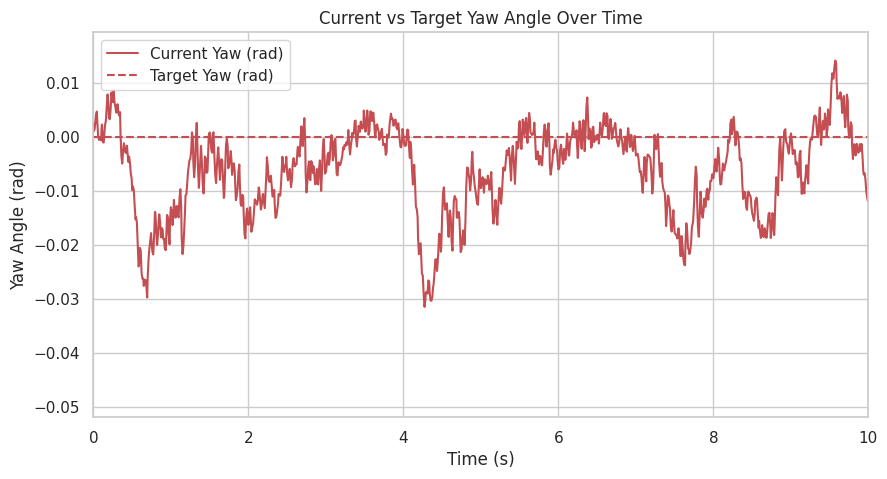

In [5]:
plt.figure(figsize=(10, 5))

# Plot yaw angles
plt.plot(df['timestamp'], df['cur_rpy_z'], label='Current Yaw (rad)', color=palette[3], linestyle='-')
plt.plot(df['timestamp'], df['desired_euler_z'], label='Target Yaw (rad)', color=palette[3], linestyle='--')

# Set x-axis limits
plt.xlim([0, 10])

# Beautify the plot
plt.legend()
plt.title('Current vs Target Yaw Angle Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Yaw Angle (rad)')
plt.savefig('./figures/yaw.png')

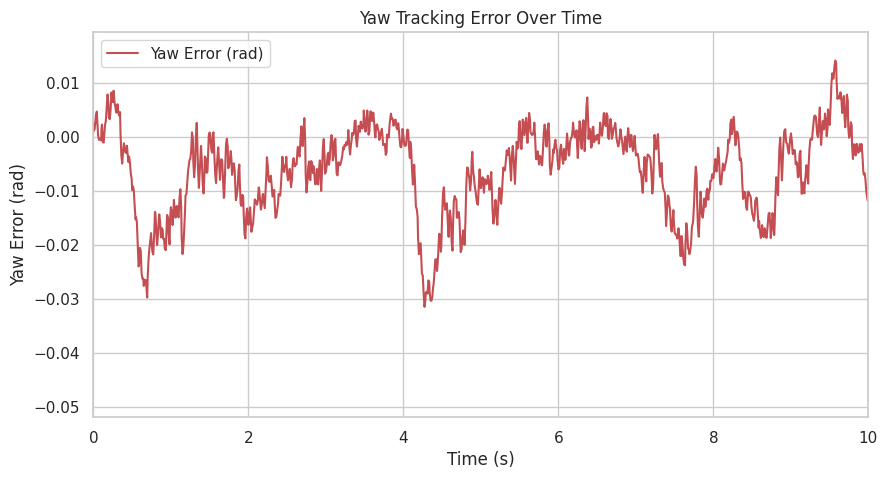

In [6]:
plt.figure(figsize=(10, 5))

# Plot yaw error
plt.plot(df['timestamp'], df['cur_rpy_z'] - df['desired_euler_z'], 
         label='Yaw Error (rad)', color=palette[3], linestyle='-')

# Set x-axis limits
plt.xlim([0, 10])

# Beautify the plot
plt.legend()
plt.title('Yaw Tracking Error Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Yaw Error (rad)')
plt.savefig('./figures/yaw_error.png')